In [1]:
import pandas as pd 

titanic_train = pd.read_csv('/Users/patash/PSTB/Week_2/day_3/titanic/train.csv')
print(titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
duplicates = titanic_train.duplicated()
print(f"Doublons: {duplicates.sum()}")
# titanic_cleaned = titanic.drop_duplicates() - pour supprimer les doublons
# rows_before = titanic.shape[0] - nmb de lignes
# rows_after = titanic_cleaned.shape[0]

Doublons: 0


In [4]:
# Exercise 2
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Cabin - 77% manquantes - supprimer la colonne
titanic_cleaned = titanic_train.drop(columns=['Cabin'])
print(titanic_cleaned)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
# Age - 20% manquantes
titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
print(titanic_cleaned['Age'].isnull().sum())


0


In [9]:
# Embarked - 2 valeurs manquantes
titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0], inplace=True)
print(titanic_cleaned['Embarked'].isnull().sum())

0


In [10]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
# Exercise 3
# Family size
titanic_cleaned['FamilySize'] = titanic_cleaned['SibSp'] + titanic_cleaned['Parch'] + 1
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [13]:
# Titre 
titanic_cleaned['Title'] = titanic_cleaned['Name'].str.extract(r' (\w+)\.', expand=False)
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [14]:
# Label encoding
titanic_cleaned['Sex'] = titanic_cleaned['Sex'].map({'male': 1, 'female': 0})

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic_cleaned['Embarked'] = encoder.fit_transform(titanic_cleaned['Embarked'])

# One-hot encoding
titanic_cleaned = pd.get_dummies(titanic_cleaned, columns=['Title'], drop_first=True)
titanic_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,True,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,False,False,False,False,False,True,False,False,False,False


In [16]:
# Fare_normalized
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

titanic_cleaned['Fare_normalized'] = scaler.fit_transform(titanic_cleaned[['Fare']])
titanic_cleaned['Fare_normalized'].head()

0    0.014151
1    0.139136
2    0.015469
3    0.103644
4    0.015713
Name: Fare_normalized, dtype: float64

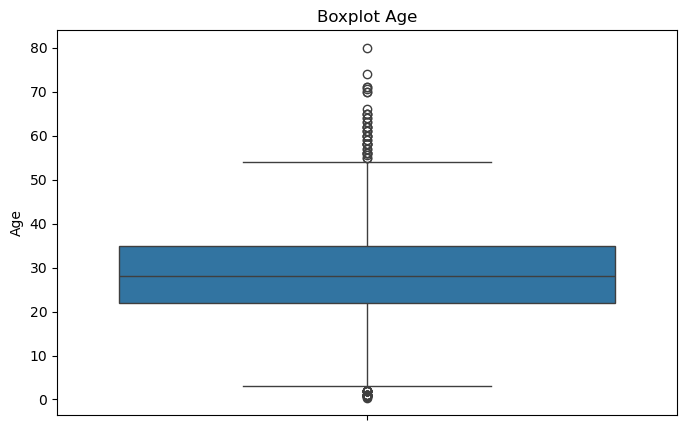

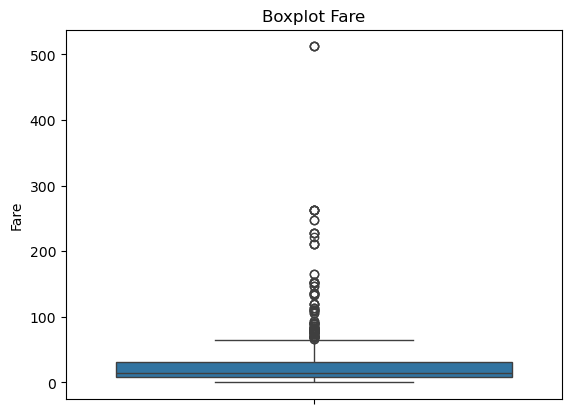

In [24]:
# Exercise 4
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_cleaned["Age"])

plt.title("Boxplot Age")
plt.show()

sns.boxplot(data=titanic_cleaned["Fare"])

plt.title("Boxplot Fare")
plt.show()

In [25]:
Q1 = titanic_cleaned['Age'].quantile(0.25)
Q3 = titanic_cleaned['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_cleaned = titanic_cleaned[(titanic_cleaned['Age'] >= lower_bound) & (titanic_cleaned['Age'] <= upper_bound)]

Q1 = titanic_cleaned['Fare'].quantile(0.25)
Q3 = titanic_cleaned['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_cleaned = titanic_cleaned[(titanic_cleaned['Fare'] >= lower_bound) & (titanic_cleaned['Fare'] <= upper_bound)]


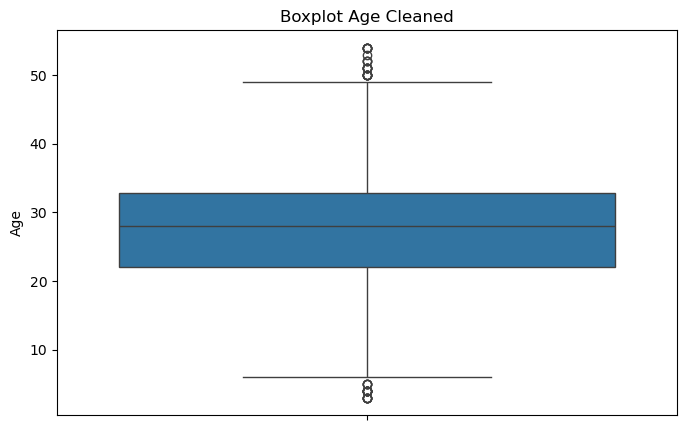

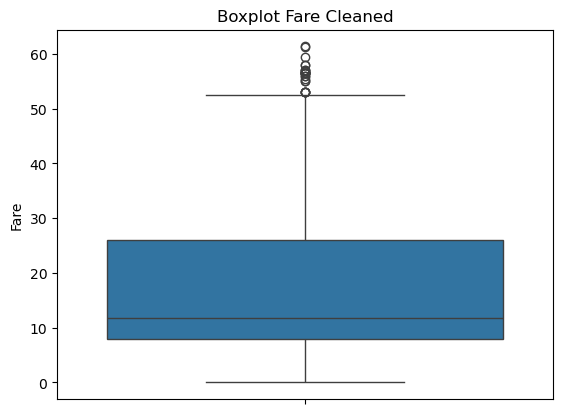

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=titanic_cleaned["Age"])

plt.title("Boxplot Age Cleaned")
plt.show()

sns.boxplot(data=titanic_cleaned["Fare"])

plt.title("Boxplot Fare Cleaned")
plt.show()

In [29]:
# Exercise 7 
bins = [0, 12, 18, 30, 50, 100]  # Intervalles d'âge
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  

titanic_cleaned['AgeGroup'] = pd.cut(titanic_cleaned['Age'], bins=bins, labels=labels)

age_dummies = pd.get_dummies(titanic_cleaned['AgeGroup'], prefix='Age')

titanic_cleaned = pd.concat([titanic_cleaned, age_dummies], axis=1)


In [31]:
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Child,Age_Teen,Age_Young Adult,Age_Adult,Age_Senior,Age_Child,Age_Teen,Age_Young Adult,Age_Adult,Age_Senior
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,True,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,True,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,False,False,False,True,False,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,False,False,False,True,False,False,False,False,True,False
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,...,False,False,True,False,False,False,False,True,False,False
